# **Predict Customer Personality to Boost Marketing Campaign**
---

# Import Library

In [513]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [514]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Read Data

In [515]:
# Read data
link = 'https://raw.githubusercontent.com/sabirinID/Predicting-Customer-Personality/main/Dataset/marketing_campaign_data.csv'
df = pd.read_csv(link)

In [516]:
df.sample(n=5, random_state=100)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1514,1514,3865,1977,D3,Bertunangan,20981000.0,0,0,30-04-2013,14,2000,12000,10000,6000,13000,30000,1,3,1,2,8,0,0,0,0,0,0,3,11,1
864,864,4120,1975,D3,Lajang,49514000.0,1,0,17-12-2013,61,88000,39000,78000,58000,13000,93000,2,6,1,4,7,0,0,0,0,0,0,3,11,0
1085,1085,6295,1977,S1,Menikah,54233000.0,0,1,04-02-2013,46,652000,8000,158000,21000,0,142000,4,11,6,5,8,0,0,0,0,0,0,3,11,0
1575,1575,4967,1960,S3,Bertunangan,38201000.0,0,1,29-03-2013,19,233000,0,23000,0,0,12000,4,5,1,5,8,0,0,0,0,0,0,3,11,0
1254,1254,5011,1963,S1,Cerai,68118000.0,0,1,18-10-2013,51,595000,23000,123000,10000,23000,154000,2,8,9,4,6,0,0,0,0,0,0,3,11,0


# 0. Data Understanding

## 0.1. Features Definition

In [517]:
df.columns

Index(['Unnamed: 0', 'ID', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

| Feature Name           | Feature Description                              |
|------------------------|--------------------------------------------------|
| Unnamed: 0             | Index                                            |
| ID                     | Customer ID                                      |
| Year_Birth             | Customer’s year of birth                         |
| Education              | Customer’s level of education                    |
| Marital_Status         | Customer’s marital status                        |
| Income                 | Customer’s yearly household income               |
| Kidhome                | Number of children in customer’s household       |
| Teenhome               | Number of teenagers in customer’s household      |
| Dt_Customer            | Date of customer joining                         |
| Recency                | Number of days since customer’s last purchase    |
| MntCoke                | Amount spent on coke products                    |
| MntFruits              | Amount spent on fruit products                   |
| MntMeatProducts        | Amount spent on meat products                    |
| MntFishProducts        | Amount spent on fish products                    |
| MntSweetProducts       | Amount spent on sweet products                   |
| MntGoldProds           | Amount spent on gold products                    |
| NumDealsPurchases      | Number of purchases made with a special discount |
| NumWebPurchases        | Number of purchases made through the web         |
| NumCatalogPurchases    | Number of purchases made made using a catalog    |
| NumStorePurchases      | Number of purchases made made directly in stores |
| NumWebVisitsMonth      | Number of visits to the web in the last month    |
| AcceptedCmp3           | Whether the customer accepted campaign 3         |
| AcceptedCmp4           | Whether the customer accepted campaign 4         |
| AcceptedCmp5           | Whether the customer accepted campaign 5         |
| AcceptedCmp1           | Whether the customer accepted campaign 1         |
| AcceptedCmp2           | Whether the customer accepted campaign 2         |
| Complain               | Whether the customer has made a complaint        |
| Z_CostContact          | Cost of contacting the customer                  |
| Z_Revenue              | Revenue from the customer                        |
| Response               | Whether the customer responded to the campaign   |

## 0.2. Dimensions of the DataFrame

In [518]:
df.shape

(2240, 30)

In [519]:
print('Dataset ini memiliki dimensi data, yaitu')
print('Jumlah baris: {}'.format(df.shape[0]))
print('Jumlah kolom: {}'.format(df.shape[1]))

Dataset ini memiliki dimensi data, yaitu
Jumlah baris: 2240
Jumlah kolom: 30


## 0.3. Data Types of the Features

In [520]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

🔎 Observasi
- Tipe data: float64, int64, dan object.
- Fitur `Unnamed: 0` merupakan indeks tambahan yang dihasilkan saat mengimpor data ke DataFrame, sehingga dapat dihapus, karena tidak memberikan informasi yang berguna.
- Fitur `ID` hanya berisi identifikasi unik untuk setiap baris data tanpa memberikan informasi tambahan yang relevan untuk analisis, sehingga dapat dihapus.
- Fitur `Dt_Customer` seharusnya memiliki tipe data datetime bukan object, sehingga harus diubah.
- Beberapa fitur perlu diubah penamaannya agar tidak menimbulkan ketidakjelasan atau ambiguitas. Penamaan fitur akan menggunakan kaidah penamaan `PascalCase` atau `UpperCamelCase`.

In [521]:
# Drop 'Unnamed: 0' and 'ID' features
df.drop(columns=['Unnamed: 0', 'ID'], inplace=True)

In [522]:
# Convert dtype: object to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [523]:
new_columns = {
    'Year_Birth'      : 'BirthYear',
    'Marital_Status'  : 'MaritalStatus',
    'Kidhome'         : 'NumChildren',
    'Teenhome'        : 'NumTeenagers',
    'Dt_Customer'     : 'CustomerDate',
    'MntCoke'         : 'CokeSpending',
    'MntFruits'       : 'FruitSpending',
    'MntMeatProducts' : 'MeatSpending',
    'MntFishProducts' : 'FishSpending',
    'MntSweetProducts': 'SweetSpending',
    'MntGoldProds'    : 'GoldSpending',
    'AcceptedCmp3'    : 'AcceptedCampaign3',
    'AcceptedCmp4'    : 'AcceptedCampaign4',
    'AcceptedCmp5'    : 'AcceptedCampaign5',
    'AcceptedCmp1'    : 'AcceptedCampaign1',
    'AcceptedCmp2'    : 'AcceptedCampaign2',
    'Complain'        : 'Complaint',
    'Z_CostContact'   : 'CostContact',
    'Z_Revenue'       : 'Revenue'
}

df = df.rename(columns=new_columns)

In [524]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   BirthYear            2240 non-null   int64         
 1   Education            2240 non-null   object        
 2   MaritalStatus        2240 non-null   object        
 3   Income               2216 non-null   float64       
 4   NumChildren          2240 non-null   int64         
 5   NumTeenagers         2240 non-null   int64         
 6   CustomerDate         2240 non-null   datetime64[ns]
 7   Recency              2240 non-null   int64         
 8   CokeSpending         2240 non-null   int64         
 9   FruitSpending        2240 non-null   int64         
 10  MeatSpending         2240 non-null   int64         
 11  FishSpending         2240 non-null   int64         
 12  SweetSpending        2240 non-null   int64         
 13  GoldSpending         2240 non-nul

✅ Tipe data untuk setiap fitur dalam dataset sudah sesuai.

## 0.4. Detect Missing Values

In [525]:
# Check the features that have missing values
print(df.isna().values.any())
df.isna().sum().sort_values(ascending=False)

True


Income                 24
BirthYear               0
NumWebPurchases         0
Revenue                 0
CostContact             0
Complaint               0
AcceptedCampaign2       0
AcceptedCampaign1       0
AcceptedCampaign5       0
AcceptedCampaign4       0
AcceptedCampaign3       0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumDealsPurchases       0
Education               0
GoldSpending            0
SweetSpending           0
FishSpending            0
MeatSpending            0
FruitSpending           0
CokeSpending            0
Recency                 0
CustomerDate            0
NumTeenagers            0
NumChildren             0
MaritalStatus           0
Response                0
dtype: int64

In [526]:
# Summarize missing value
total = df.isna().sum().sort_values(ascending=False)
percent = round(df.isna().mean() * 100, 2).sort_values(ascending=False)

na = pd.concat([total, percent], axis=1, keys=['Total', 'Percentage (%)'])
na = na[na['Total'] > 0]
na.reset_index(inplace=True)
na.rename(columns={'index': 'Feature Name'}, inplace=True)
na

,Feature Name,Total,Percentage (%)
0,Income,24,1.07


🔎 Observasi
- Fitur `Income` memiliki _missing values_ sebanyak 1,07%, sehingga akan dihapus untuk membuat model yang lebih akurat.

In [527]:
# Drop missing values
df.dropna(inplace=True)

# Recheck
df.isna().sum().sum()

0

✅ Dataset sudah bersih dari _missing values_.

## 0.5. Detect Duplicate Values

In [528]:
# Check the features that have duplicate values
print(df.duplicated().any())
df.duplicated().sum()

True


183

🔎 Observasi
- Dataset memiliki 183 baris data yang duplikat.

In [529]:
# Drop duplicate values
df.drop_duplicates(inplace=True)

# Recheck
df.duplicated().sum()

0

✅ Dataset sudah bebas dari _duplicate values_.

## 0.6. Number of Unique Classes

In [530]:
# Count number of unique class
df.nunique().sort_values(ascending=False)

Income                 1974
CokeSpending            776
CustomerDate            662
MeatSpending            554
GoldSpending            212
FishSpending            182
SweetSpending           176
FruitSpending           158
Recency                 100
BirthYear                59
NumWebVisitsMonth        16
NumWebPurchases          15
NumDealsPurchases        15
NumCatalogPurchases      14
NumStorePurchases        14
MaritalStatus             6
Education                 5
NumTeenagers              3
NumChildren               3
AcceptedCampaign3         2
AcceptedCampaign4         2
AcceptedCampaign5         2
AcceptedCampaign1         2
AcceptedCampaign2         2
Complaint                 2
Response                  2
CostContact               1
Revenue                   1
dtype: int64

In [531]:
values = {'Feature Name': [], 'Unique Classes': []}
for col in df.columns:
    values['Feature Name'].append(col)
    values['Unique Classes'].append(df[col].unique())
    
unique = pd.DataFrame(values)
unique

,Feature Name,Unique Classes
0,BirthYear,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 198..."
1,Education,"[S1, S3, S2, SMA, D3]"
2,MaritalStatus,"[Lajang, Bertunangan, Menikah, Cerai, Janda, D..."
3,Income,"[58138000.0, 46344000.0, 71613000.0, 26646000...."
4,NumChildren,"[0, 1, 2]"
5,NumTeenagers,"[0, 1, 2]"
6,CustomerDate,"[2012-09-04 00:00:00, 2014-03-08 00:00:00, 201..."
7,Recency,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 59, 82, 5..."
8,CokeSpending,"[635000, 11000, 426000, 173000, 520000, 235000..."
9,FruitSpending,"[88000, 1000, 49000, 4000, 43000, 42000, 65000..."


🔎 Observasi
- Fitur `CostContact` dan `Revenue` masing-masing hanya memiliki 1 kategori, sehingga dapat dihapus.

In [532]:
# Drop 'CostContact' and 'Revenue' features
df.drop(columns=['CostContact', 'Revenue'], inplace=True)

## 0.7. Descriptive Statistics

In [533]:
# Statistics for the columns (features)
df.describe(include='all')

,BirthYear,Education,MaritalStatus,Income,NumChildren,NumTeenagers,CustomerDate,Recency,CokeSpending,FruitSpending,MeatSpending,FishSpending,SweetSpending,GoldSpending,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCampaign3,AcceptedCampaign4,AcceptedCampaign5,AcceptedCampaign1,AcceptedCampaign2,Complaint,Response
count,2033.000000,2033,2033,2.033000e+03,2033.000000,2033.000000,2033,2033.000000,2.033000e+03,2033.000000,2.033000e+03,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000
unique,NaN,5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,S1,Menikah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1019,788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1968.800787,NaN,NaN,5.235972e+07,0.443187,0.508116,2013-07-11 17:53:48.135759872,48.867191,3.051727e+05,26303.984260,1.678214e+05,37465.814068,27152.975898,43810.624693,2.336449,4.097885,2.671422,5.782095,5.321200,0.074274,0.076242,0.072307,0.065421,0.012789,0.009838,0.152976
min,1893.000000,NaN,NaN,1.730000e+06,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,NaN,NaN,3.552300e+07,0.000000,0.000000,2013-01-17 00:00:00,24.000000,2.300000e+04,2000.000000,1.600000e+04,3000.000000,1000.000000,9000.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,NaN,NaN,5.153700e+07,0.000000,0.000000,2013-07-13 00:00:00,49.000000,1.750000e+05,8000.000000,6.800000e+04,12000.000000,8000.000000,24000.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,NaN,NaN,6.848700e+07,1.000000,1.000000,2014-01-02 00:00:00,74.000000,5.050000e+05,33000.000000,2.300000e+05,50000.000000,34000.000000,56000.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,NaN,NaN,6.666660e+08,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1.493000e+06,199000.000000,1.725000e+06,259000.000000,262000.000000,321000.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [534]:
# Define features
num = df.select_dtypes(exclude=['object'])
cat = df.select_dtypes(include=['object'])

num_cols = num.columns
cat_cols = cat.columns

In [535]:
print(f'Jumlah fitur numerikal  : {num.shape[1]}')
print(f'Jumlah fitur kategorikal: {cat.shape[1]}')

Jumlah fitur numerikal  : 24
Jumlah fitur kategorikal: 2


### Numerical Features

In [536]:
num.describe(percentiles=[0.25, 0.50, 0.75, 0.85, 0.90, 0.95]).T

,count,mean,min,25%,50%,75%,85%,90%,95%,max,std
BirthYear,2033.0,1968.800787,1893.0,1959.0,1970.0,1977.0,1982.0,1984.0,1988.0,1996.0,11.978005
Income,2033.0,52359722.577472,1730000.0,35523000.0,51537000.0,68487000.0,75774600.0,79856600.0,84137800.0,666666000.0,25533088.858311
NumChildren,2033.0,0.443187,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,0.535955
NumTeenagers,2033.0,0.508116,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,0.546155
CustomerDate,2033,2013-07-11 17:53:48.135759872,2012-07-30 00:00:00,2013-01-17 00:00:00,2013-07-13 00:00:00,2014-01-02 00:00:00,2014-03-17 00:00:00,2014-04-18 00:00:00,2014-05-22 00:00:00,2014-06-29 00:00:00,NaN
Recency,2033.0,48.867191,0.0,24.0,49.0,74.0,84.0,89.0,94.0,99.0,28.972956
CokeSpending,2033.0,305172.651254,0.0,23000.0,175000.0,505000.0,703200.0,822800.0,1001000.0,1493000.0,337406.060417
FruitSpending,2033.0,26303.98426,0.0,2000.0,8000.0,33000.0,60200.0,82000.0,123000.0,199000.0,39779.313324
MeatSpending,2033.0,167821.446139,0.0,16000.0,68000.0,230000.0,399000.0,506600.0,689000.0,1725000.0,226831.44409
FishSpending,2033.0,37465.814068,0.0,3000.0,12000.0,50000.0,89000.0,120000.0,172000.0,259000.0,54800.469646


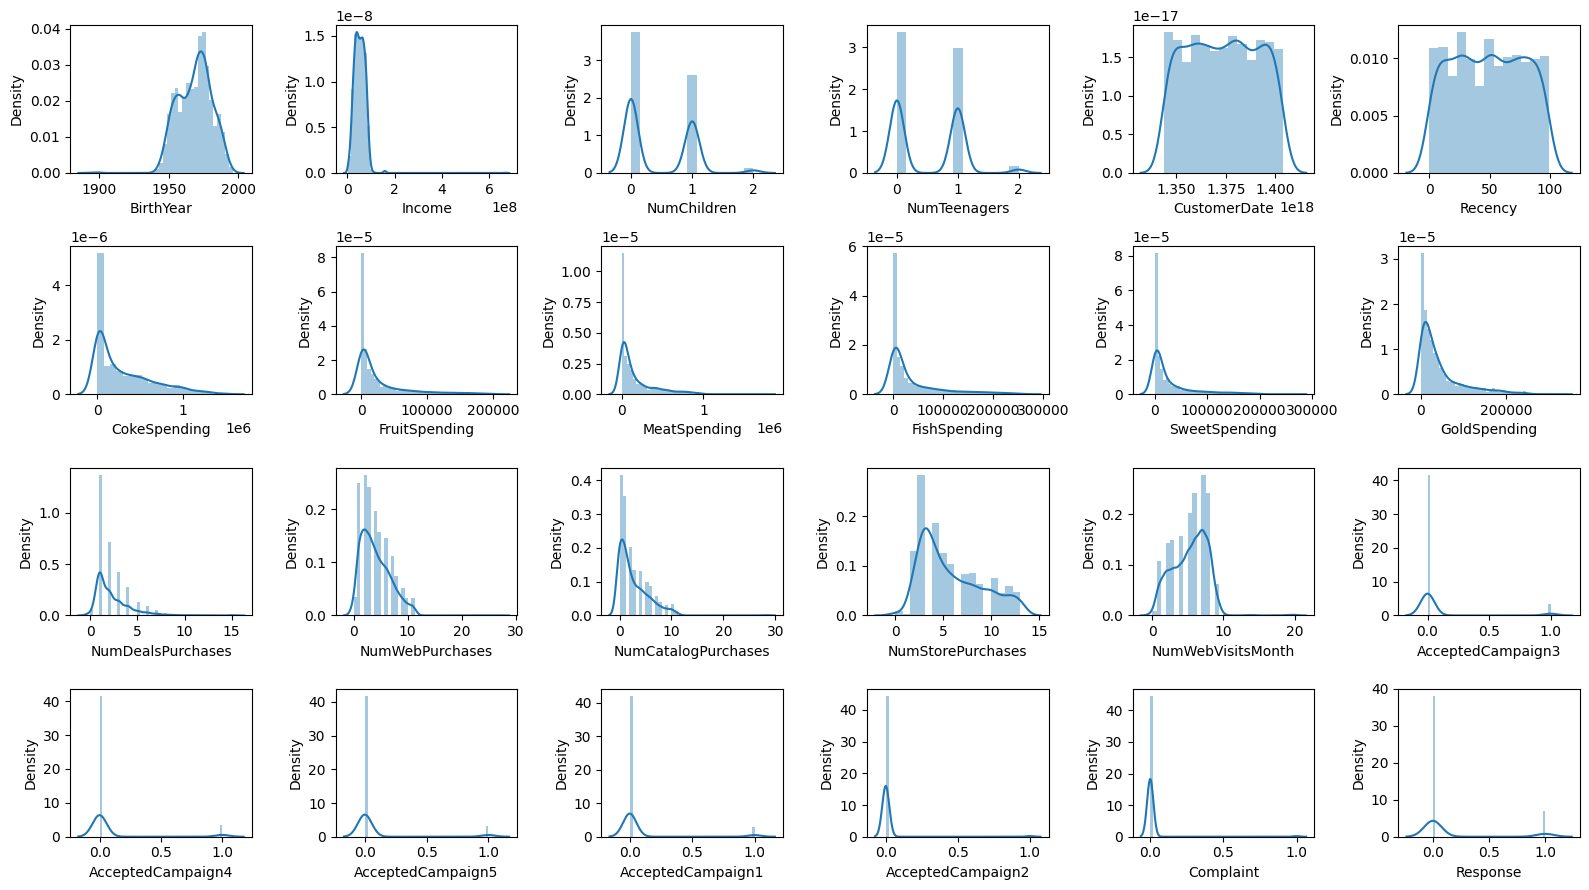

In [537]:
plt.figure(figsize=(16, 9))
for i in range(0, len(num_cols)):
    plt.subplot(4, 6, i+1)
    sns.distplot(df[num_cols[i]])
    plt.tight_layout()

🔎 Observasi
- Secara umum, fitur-fitur dalam dataset memiliki distribusi yang cenderung _positive skewness_ atau menceng kanan.
- Fitur `CustomerDate` dan `Recency` memiliki distribusi yang cenderung normal.

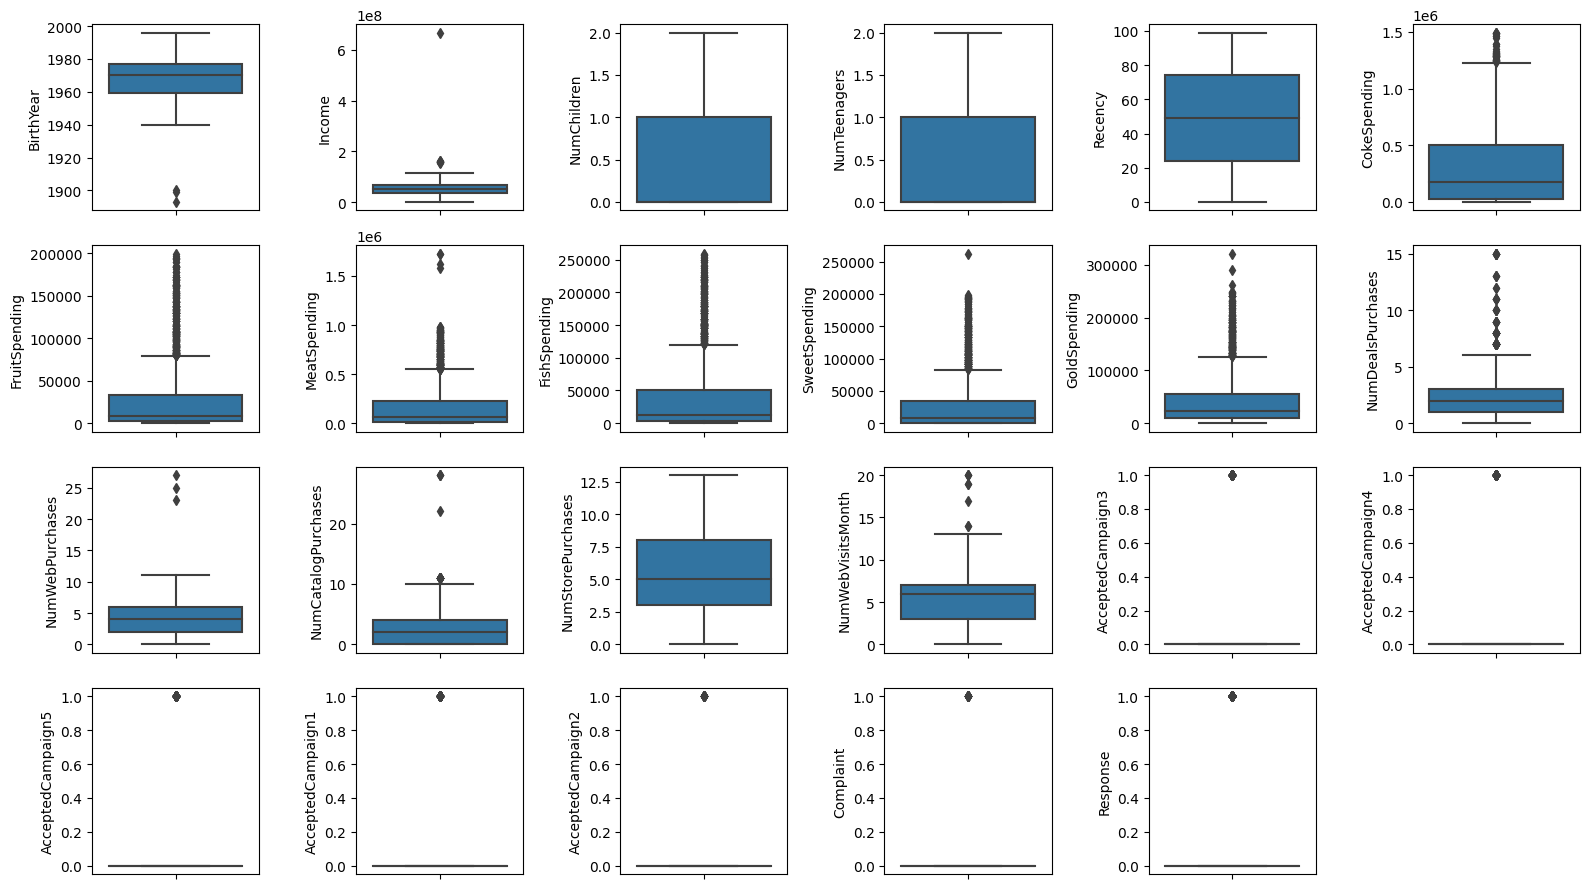

In [538]:
plt.figure(figsize=(16, 9))
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

for i in range(0, len(num_cols)):
    plt.subplot(4, 6, i+1)
    sns.boxplot(y=df[num_cols[i]])
    plt.tight_layout()

🔎 Observasi
- Secara umum, sebagian besar fitur menunjukkan adanya _outlier_.
- Fitur seperti `BirthYear` dan `Income` menunjukkan adanya nilai yang ekstrem, sehingga kita akan menghilangkan nilai-nilai ekstrem tersebut agar tidak mengurangi _insight_ yang diperoleh dari analisis data.

🔽 `BirthYear`

In [539]:
df[df['BirthYear'] < 1940]

,BirthYear,Education,MaritalStatus,Income,NumChildren,NumTeenagers,CustomerDate,Recency,CokeSpending,FruitSpending,MeatSpending,FishSpending,SweetSpending,GoldSpending,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCampaign3,AcceptedCampaign4,AcceptedCampaign5,AcceptedCampaign1,AcceptedCampaign2,Complaint,Response
192,1900,D3,Cerai,36640000.0,1,0,2013-09-26,99,15000,6000,8000,7000,4000,25000,1,2,1,2,5,0,0,0,0,0,1,0
239,1893,D3,Lajang,60182000.0,0,1,2014-05-17,23,8000,0,5000,7000,0,2000,1,1,0,2,4,0,0,0,0,0,0,0
339,1899,S3,Bertunangan,83532000.0,0,0,2013-09-26,36,755000,144000,562000,104000,64000,224000,1,4,6,4,1,0,0,1,0,0,0,0


🔎 Observasi
- Terdapat customer yang lahir pada tahun 1893, 1899, dan 1900 atau berusia lebih dari 100 tahun, sehingga poin data ini akan dihapus, karena tidak relevan.

In [541]:
# Remove extreme data points
df = df.drop(df[df['BirthYear'] < 1940].index)

🔽 `Income`

In [542]:
df[df['Income'] > 200_000_000]

,BirthYear,Education,MaritalStatus,Income,NumChildren,NumTeenagers,CustomerDate,Recency,CokeSpending,FruitSpending,MeatSpending,FishSpending,SweetSpending,GoldSpending,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCampaign3,AcceptedCampaign4,AcceptedCampaign5,AcceptedCampaign1,AcceptedCampaign2,Complaint,Response
2233,1977,S1,Bertunangan,666666000.0,1,0,2013-06-02,23,9000,14000,18000,8000,1000,12000,4,3,1,3,6,0,0,0,0,0,0,0


In [543]:
# Remove extreme data point
df = df.drop(df[df['Income'] > 200_000_000].index)

🔽 `Purchases`

In [544]:
df[df['NumWebPurchases'] > 20]

,BirthYear,Education,MaritalStatus,Income,NumChildren,NumTeenagers,CustomerDate,Recency,CokeSpending,FruitSpending,MeatSpending,FishSpending,SweetSpending,GoldSpending,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCampaign3,AcceptedCampaign4,AcceptedCampaign5,AcceptedCampaign1,AcceptedCampaign2,Complaint,Response
1806,1966,S3,Lajang,7144000.0,0,2,2013-12-07,92,81000,4000,33000,5000,2000,291000,0,23,1,1,0,0,0,0,0,0,0,0
1898,1945,S3,Lajang,113734000.0,0,0,2014-05-28,9,6000,2000,3000,1000,262000,3000,0,27,0,0,1,0,0,0,0,0,0,0
1975,1969,S1,Menikah,4428000.0,0,1,2013-10-05,0,16000,4000,12000,2000,4000,321000,0,25,0,0,1,0,0,0,0,0,0,0


In [545]:
df[df['NumCatalogPurchases'] > 20]

,BirthYear,Education,MaritalStatus,Income,NumChildren,NumTeenagers,CustomerDate,Recency,CokeSpending,FruitSpending,MeatSpending,FishSpending,SweetSpending,GoldSpending,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCampaign3,AcceptedCampaign4,AcceptedCampaign5,AcceptedCampaign1,AcceptedCampaign2,Complaint,Response
21,1979,S1,Menikah,2447000.0,1,0,2013-01-06,42,1000,1000,1725000,1000,1000,1000,15,0,28,0,1,0,0,0,0,0,0,0
164,1973,S3,Menikah,157243000.0,0,1,2014-03-01,98,20000,2000,1582000,1000,2000,1000,15,0,22,0,0,0,0,0,0,0,0,0
687,1982,S3,Menikah,160803000.0,0,0,2012-08-04,21,55000,16000,1622000,17000,3000,4000,15,0,28,1,0,0,0,0,0,0,0,0
1653,1977,S1,Bertunangan,157146000.0,0,0,2013-04-29,13,1000,0,1725000,2000,1000,1000,0,0,28,0,1,0,0,0,0,0,0,0


In [546]:
# Remove extreme data points
df = df.drop(df[(df['NumWebPurchases'] > 20) | (df['NumCatalogPurchases'] > 20)].index)

### Categorical Features

In [547]:
cat.describe().T

,count,unique,top,freq
Education,2033,5,S1,1019
MaritalStatus,2033,6,Menikah,788


🔽 `Education`

In [548]:
df['Education'].value_counts(normalize=True)

Education
S1     0.501978
S3     0.217112
S2     0.166172
D3     0.090504
SMA    0.024233
Name: proportion, dtype: float64

🔽 `MaritalStatus`

In [549]:
df['MaritalStatus'].value_counts(normalize=True)

MaritalStatus
Menikah        0.387735
Bertunangan    0.252720
Lajang         0.217112
Cerai          0.106330
Janda          0.034619
Duda           0.001484
Name: proportion, dtype: float64

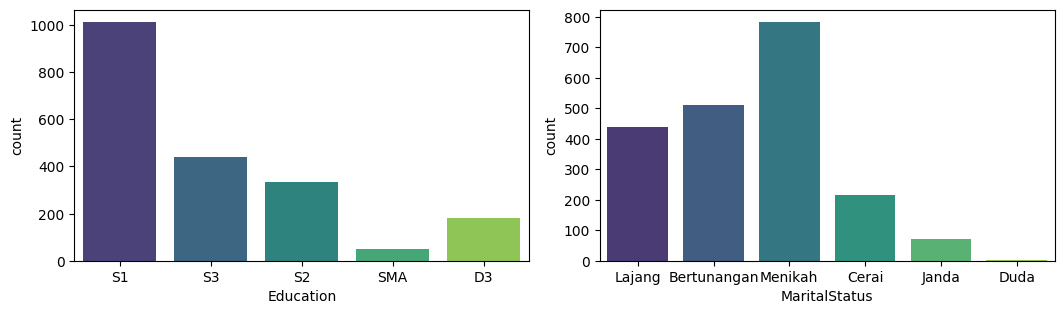

In [552]:
plt.figure(figsize=(16, 9))
for i in range(0, len(cat_cols)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[cat_cols[i]], palette='viridis')
    plt.tight_layout()